<a href="https://colab.research.google.com/github/SAB-6/Spam-Classification/blob/master/Spam_classificattion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
a

#  Table of Contents
- [Step-1](#Project-Overview): Project objectives
- [Step-2](#Load-Data-and-Explore-it): Understanding the dataset
- [Step-3](#Data-Preprocessing) Data Preprocessing
- [Step-4](#Train-model-and-make-prediction): Modeling
- [Step-5](#Model-Evaluation): Model Evaluation
- [Step-6](#Concluding-Remarks): Conclusion



## Dependencies

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
%matplotlib inline
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
from sklearn.compose import ColumnTransformer, make_column_transformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pip install tpot

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.8MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=fff78134e9d9f63717a8b2303fd1ba9e64ad898dc59dc3515e518f46275408e1
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


## Project Overview


## Load Data and Explore it

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2020-05-30 21:26:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   777KB/s    in 0.3s    

2020-05-30 21:26:23 (777 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



In [6]:
ls

sample_data/


In [4]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [0]:
df = pd.read_table('SMSSpamCollection', sep ='\t', names = ['label', 'sms_message'])

In [6]:
#check the first 10 samples 
df.head(10)

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [17]:
#check the last 10 samples
df.tail(10)

,label,sms_message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        5572 non-null   object
 1   sms_message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [0]:
#df.isnull().sum().sort_values(ascending = False)

In [0]:
#for i in df['sms_message']:
#  print(len(i))

## Data Preprocessing

In [0]:
CountVectorizer?

In [7]:
#Turn target column (label) to numeric values
create_numeric = lambda x: 1 if x == 'spam' else 0
df['label'] = df.label.map(create_numeric)
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


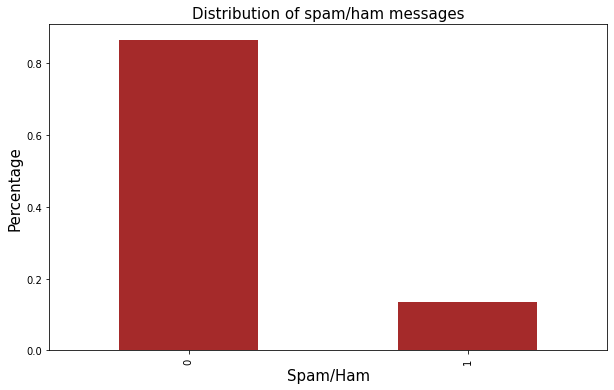

In [8]:
#(df.label.value_counts()/len(df)).hist()
(df['label'].value_counts()/len(df)).plot(kind='bar', color = 'brown',figsize=(10, 6), stacked=False)
plt.xlabel('Spam/Ham', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Distribution of spam/ham messages', fontsize=15);

In [0]:
# split data into training and test sets
train_features, test_features, train_target, test_target = train_test_split(df['sms_message'],df['label'],
                                                     random_state = 42)

In [0]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [0]:
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

In [0]:
# Instantiate countvectoriozer and tfidf
counter = CountVectorizer(stop_words= 'english')
tfidf = TfidfTransformer()
pipeline = Pipeline([('counter', counter), ('tfidf', tfidf)])

## Train model and make prediction

In [0]:
_train_features = pipeline.fit_transform(train_features)
_test_features = pipeline.transform(test_features)

## Build a base line model using logistic regression and make prediction

In [0]:
#Instantiate logistic regression
model_lr = LogisticRegression()

In [23]:
model_lr.fit(_train_features, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = model_lr.predict(_test_features)

## Model-Evaluation

In [0]:
def evaluate_model(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()
    precision = precision_score(y_test, y_pred, labels=labels, average = 'weighted')
    recall = recall_score(y_test, y_pred, labels=labels, average = 'weighted')
    f1 = f1_score(y_test, y_pred, labels=labels, average = 'weighted')

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1_score:", f1)

In [26]:
evaluate_model(test_target, pred)

Labels: [0 1]
Confusion Matrix:
 [[1207    0]
 [  45  141]]
Accuracy: 0.9676956209619526
Precision: 0.9688567208475055
Recall: 0.9676956209619526
F1_score: 0.9657684296265534


## Improving the model

In [0]:
#create a column that ounts the number of words per message
msg_length = lambda x: len(x.split())
df['msg_length'] = df['sms_message'].apply(msg_length)

In [0]:
# create a column to count the number of punctuation excluding comma and full stop
from collections import Counter
punct = [i for i in punctuation if i not in (',','.')]

count_punct = lambda x: sum([1 for i in x if i in punct])

In [0]:
df['punct']= df['sms_message'].map(count_punct)

In [30]:
df.head()

,label,sms_message,msg_length,punct
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,5
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1


In [0]:
#counter = CountVectorizer(tokenizer = tokenize, stop_words= 'english', ngram_range=(1,2))
#tfidf = TfidfTransformer()
#pipeline = Pipeline([('counter', counter), ('tfidf', tfidf)])

In [0]:
#df[df['label'] == 1]

In [0]:
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

In [0]:
#numeric_features = ['msg_length','punct']
#categorical_features = ['sms_message']

#pipeline = make_pipeline(make_column_transformer(
#    (categorical_features, make_pipeline(
#       (CountVectorizer(tokenizer=tokenize)),
#       (TfidfTransformer())
#       )),
#       (numeric_features, StandardScaler())),
#       LogisticRegression())  

In [0]:
numeric_features = ['msg_length','punct']
categorical_features = ['sms_message']

pipeline = Pipeline([
                     ('transformer', make_column_transformer(
                             (categorical_features, Pipeline([
                            ('counter',CountVectorizer(tokenizer=tokenize)),
                            ('tfidf',TfidfTransformer())
                            ])),
                        (numeric_features, StandardScaler())
                        )),
                      ('lr', LogisticRegression())
                     ])

In [39]:
pipeline.get_params()

{'lr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('transformer',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('list-1', ['sms_message'],
                                    Pipeline(memory=None,
                         

In [0]:
param_grid ={'lr_C' = [0.5,1.0,1.0],
             'lr__penalty' =['l1','l2']
             'columntransformer'
             }

param_grid = {
    'columntransformer__pipeline__simpleimputer__strategy': ['mean', 'median'],
    'logisticregression__C': [0.1, 1.0, 1.0],
    }

In [0]:
pipeline = Pipeline([
    ('features', FeatureUnion([

        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer())
        ])),

        ('starting_verb', StartingVerbExtractor())
    ])),

    ('lr', LogisticRegression())
])

In [0]:
pipeline = Pipeline([
    ('features', FeatureUnion([

        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer())
        ])),

        ('starting_verb', StartingVerbExtractor())
    ])),

    ('clf', RandomForestClassifier())
])

In [0]:
def model_pipeline():
    pipeline = Pipeline([
                        ('feature',FeatureUnion([
                            
                            ('nlp_pipeline', Pipeline([
                                ('count',CountVectorizer(tokenizer=tokenize)),
                                  ('tfidf',TfidfTransformer())
                            ])),
                                        
                            ('strvb', StartingVerbExtractor())
                            ])),
                         
                         ('clf', RandomForestClassifier())])
    
    

    return pipeline

def load_data(engineer_data = True):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
    df = pd.read_csv('corporate_messaging.csv', encoding='latin-1')
    df = df[(df["category:confidence"] == 1) & (df['category'] != 'Exclude')]
    X = df.text.values
    y = df.category.values
    return X, y


def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens


def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)


def main():
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = model_pipeline()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    display_results(y_test, y_pred)

main()

## Concluding Remarks